<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_carbondioxide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carbon Dioxide (CO₂)**

[Carbon Dioxide](https://en.m.wikipedia.org/wiki/Carbon_dioxide) (CO₂) has a Linear structure with two oxygen atoms symmetrically arranged around the carbon atom.

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Carbon-dioxide-2D-dimensions.svg/320px-Carbon-dioxide-2D-dimensions.svg.png)

* **Lower Energy Due to Greater Complexity:** Carbon Dioxide ($\text{CO}_2$) has a significantly lower (more negative) DFT energy compared to Carbon Monoxide ($\text{CO}$) primarily due to its larger size, greater number of atoms and electrons, and increased molecular complexity, which leads to a more extensive electron cloud and stronger overall interactions.
* **Enhanced Stability from Multiple Strong Bonds:** $\text{CO}_2$ possesses two strong double bonds, creating a more stable bonding configuration and greater electron delocalization across the molecule than the single bond in $\text{CO}$.
* **Electron Delocalization via Symmetry:** The symmetric linear structure of $\text{CO}_2$ allows for more efficient electron delocalization, which significantly lowers its overall electronic energy compared to the less symmetrical $\text{CO}$ molecule.
* **Increased Interactions in Larger Systems:** The higher number of atoms and electrons in $\text{CO}_2$ results in a greater number of attractive electron-nucleus and repulsive electron-electron interactions, contributing to its more negative total energy.
* **More Negative Ground State Energy for Larger Molecules:** Generally, larger molecules with more internal degrees of freedom, such as $\text{CO}_2$, tend to exhibit lower (more negative) ground-state energies due to the increased possibilities for favorable interactions within the system.

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [2]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    C   0.0000000   0.0000000   0.0000000
    O   0.0000000   0.0000000   1.1600000
    O   0.0000000   0.0000000  -1.1600000
'''

# Name
molecule = 'Carbon Dioxide (CO₂)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # Carbon dioxide is a stable, closed-shell linear molecule with double bonds between carbon and oxygen. All electrons are paired
# All valence electrons are paired (16 valence electrons total). Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [4]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Carbon Dioxide (CO₂) molecule symmetry:
 Top group: Dooh
 Group name: Dooh
--------------------


Point Group Symmetry
* **Shape:** Linear
* **Symmetry Operations:** Infinite rotation axis ($C_\infty$) along the molecule, infinite number of vertical mirror planes ($\sigma_v$), a horizontal mirror plane ($\sigma_h$), and an inversion center ($i$).
* **Point Group:** **$D_{\infty h}$ (Dooh)**

In [5]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -187.651107709876


np.float64(-187.65110770987627)

converged SCF energy = -187.651107709876


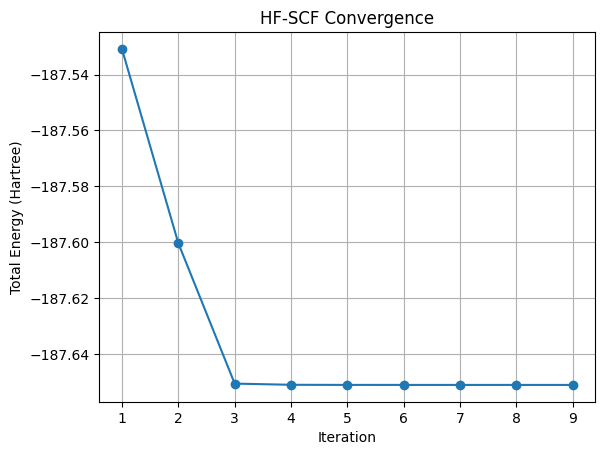

Ground state energy for Carbon Dioxide (CO₂): -187.65110770987616 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [8]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -188.598243171782


np.float64(-188.59824317178158)

In [9]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -187.651107709876
E(MP2) = -188.139123459921  E_corr = -0.488015750044167
E(SCS-MP2) = -188.117627562324  E_corr = -0.466519852447573
MP2 energy: -0.4880157500441668 Hartree


In [10]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -187.651107709876
E(CCSD) = -188.1355881717242  E_corr = -0.484480461847952
CCSD(T) correction = -0.0180344939393087


In [11]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -187.651107709876
Excited State energies (eV)
[9.56497426 9.81234358 9.81234358]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  ???      9.56497 eV    129.62 nm  f=0.0000
Excited State   2: E2uy      9.81234 eV    126.36 nm  f=0.0000
Excited State   3: E2ux      9.81234 eV    126.36 nm  f=0.0000


In [12]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-5d18adfe-25ea-4b67-93c0-9ed27e276c8f.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   O   0.000000   0.000000   1.160000    0.000000  0.000000  0.000000
   O   0.000000   0.000000  -1.160000    0.000000  0.000000  0.000000
converged SCF energy = -187.651107709877
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000     0.0000000000
1 O     0.0000000000     0.0000000000     0.0476089560
2 O     0.0000000000     0.0000000000    -0.0476089560
----------------------------------------------
cycle 1: E = -187.65110771  dE = -187.651  norm(grad) = 0.0673292


Step    0 : Gradient = 3.887e-02/4.761e-02 (rms/max) Energy = -187.6511077099
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.27794e+00 1.27794e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000  -0.000000    0.000000  0.000000 -0.000000
   O   0.000000   0.000000   1.140286    0.000000  0.000000 -0.019714
   O  -0.000000   0.000000  -1.140286   -0.000000  0.000000  0.019714
converged SCF energy = -187.652895226309
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000     0.0000000000
1 O     0.0000000000     0.0000000000    -0.0007392650
2 O     0.0000000000     0.0000000000     0.0007392650
----------------------------------------------
cycle 2: E = -187.652895226  dE = -0.00178752  norm(grad) = 0.00104548


Step    1 : Displace = 1.610e-02/1.971e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 6.036e-04/7.393e-04 (rms/max) E (change) = -187.6528952263 (-1.788e-03) Quality = 1.008
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.27794e+00 1.29778e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   0.000000   0.000000  -0.000000    0.000000  0.000000 -0.000000
   O   0.000000  -0.000000   1.140587    0.000000 -0.000000  0.000301
   O  -0.000000   0.000000  -1.140587   -0.000000  0.000000 -0.000301
converged SCF energy = -187.652895618196
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000     0.0000000000
1 O     0.0000000000     0.0000000000     0.0000518019
2 O     0.0000000000     0.0000000000    -0.0000518019
----------------------------------------------
cycle 3: E = -187.652895618  dE = -3.91888e-07  norm(grad) = 7.3259e-05


Step    2 : Displace = 2.461e-04/3.014e-04 (rms/max) Trust = 1.414e-01 (+) Grad = 4.230e-05/5.180e-05 (rms/max) E (change) = -187.6528956182 (-3.919e-07) Quality = 0.931
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.27794e+00 1.29778e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.254 seconds


[[ 0.          0.          0.        ]
 [ 0.          0.          2.15539739]
 [ 0.          0.         -2.15539739]]


converged SCF energy = -187.651107709876


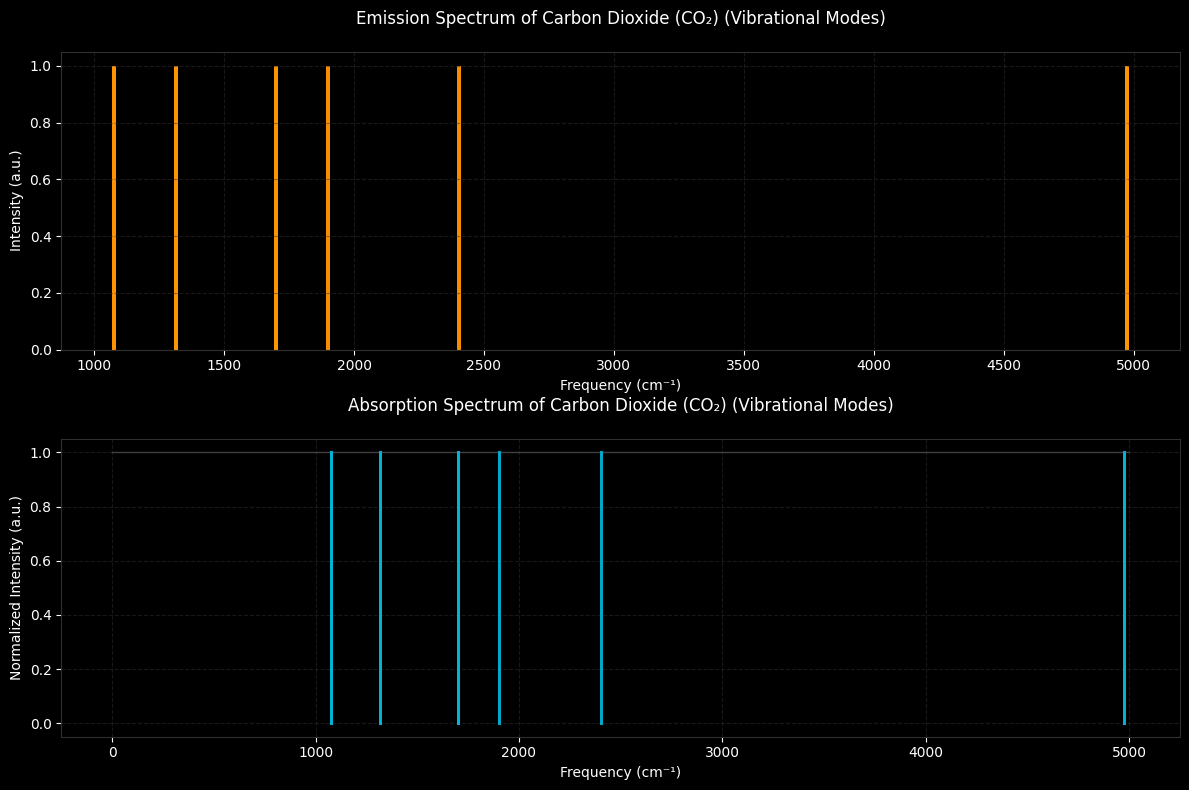

In [13]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()